# Predicting if an Airbnb listing is a scam or not

## Importing libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [2]:
airbnb_data = pd.read_csv('output.csv')
airbnb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   host_response_rate         3585 non-null   int64  
 1   host_identity_verified     3585 non-null   int64  
 2   host_total_listings_count  3585 non-null   int64  
 3   city                       3585 non-null   int64  
 4   is_location_exact          3585 non-null   int64  
 5   property_type              3585 non-null   int64  
 6   room_type                  3585 non-null   int64  
 7   accommodates               3585 non-null   int64  
 8   bathrooms                  3585 non-null   float64
 9   bedrooms                   3585 non-null   float64
 10  beds                       3585 non-null   float64
 11  bed_type                   3585 non-null   int64  
 12  amenities                  3585 non-null   int64  
 13  price                      3585 non-null   int64

## Data Cleaning

In [3]:
missing_values = airbnb_data.isnull().sum()
duplicated  = airbnb_data.duplicated().sum()
datatypes  = airbnb_data.dtypes
unqiue = airbnb_data.nunique()

columns  = pd.DataFrame({
    "missing_values":missing_values,
    "duplicated":duplicated,
    "datatypes":datatypes,
    "unqiue":unqiue,
})

columns

,missing_values,duplicated,datatypes,unqiue
host_response_rate,0,36,int64,52
host_identity_verified,0,36,int64,2
host_total_listings_count,0,36,int64,35
city,0,36,int64,38
is_location_exact,0,36,int64,2
property_type,0,36,int64,13
room_type,0,36,int64,3
accommodates,0,36,int64,14
bathrooms,0,36,float64,12
bedrooms,0,36,float64,6


There are no null or missing values, but there are 36 duplicated rows. Since our problem involves identifying whether an Airbnb listing is a scam or not, it might be better to think it through if we want to drop any rows. Those duplicated rows might possibly give us vital information.

In [4]:
# Identify the duplicated rows in the DataFrame
duplicated_rows = airbnb_data[airbnb_data.duplicated()]

# Print the duplicated rows
print("Duplicated Rows are as seen below:")
print(duplicated_rows)

Duplicated Rows are as seen below:
      host_response_rate  host_identity_verified  host_total_listings_count  \
1295                 100                       1                         52   
1311                 100                       1                         52   
1464                 100                       1                         52   
1519                 100                       1                         52   
1590                 100                       1                         52   
1637                 100                       1                         52   
1638                  98                       1                        749   
1716                  98                       1                        749   
1718                  98                       1                        749   
2113                  98                       1                        749   
2114                  98                       1                        749   
2129             

After thinking about it, it would be better to leave the rows as it is. Multiple listings on a marketplace usually leads to a higher possibility of a scam occuring.

In [5]:
features = airbnb_data.iloc[:,:-1]
predictor = airbnb_data.iloc[:,-1]

In [6]:
features.describe()

,host_response_rate,host_identity_verified,host_total_listings_count,city,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,minimum_nights,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,reviews_per_month
count,3585.00000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000
mean,95.64742,0.726081,58.902371,2.820363,0.859135,1.873361,0.429010,3.041283,1.220781,1.255230,1.607531,3.909902,1570.437378,17392.580195,3.171269,19.044630,93.749791,0.165690,1.210042,1.766165
std,11.78841,0.446030,171.119663,4.071361,0.347930,3.327397,0.538211,1.778929,0.500698,0.752129,1.010933,0.511011,873.197307,14833.132129,8.874133,35.571658,9.039049,0.371854,0.877998,1.924877
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1000.000000,1.000000,0.000000,20.000000,0.000000,0.000000,0.010000
25%,98.00000,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,4.000000,844.000000,8500.000000,1.000000,1.000000,91.000000,0.000000,0.000000,0.640000
50%,100.00000,1.000000,2.000000,2.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,4.000000,1604.000000,15000.000000,2.000000,5.000000,97.000000,0.000000,1.000000,1.000000
75%,100.00000,1.000000,7.000000,2.000000,1.000000,4.000000,1.000000,4.000000,1.000000,2.000000,2.000000,4.000000,2280.000000,22000.000000,3.000000,21.000000,100.000000,0.000000,2.000000,2.130000
max,100.00000,1.000000,749.000000,37.000000,1.000000,12.000000,2.000000,16.000000,6.000000,5.000000,16.000000,4.000000,3091.000000,400000.000000,300.000000,404.000000,100.000000,1.000000,3.000000,19.150000


## EDA

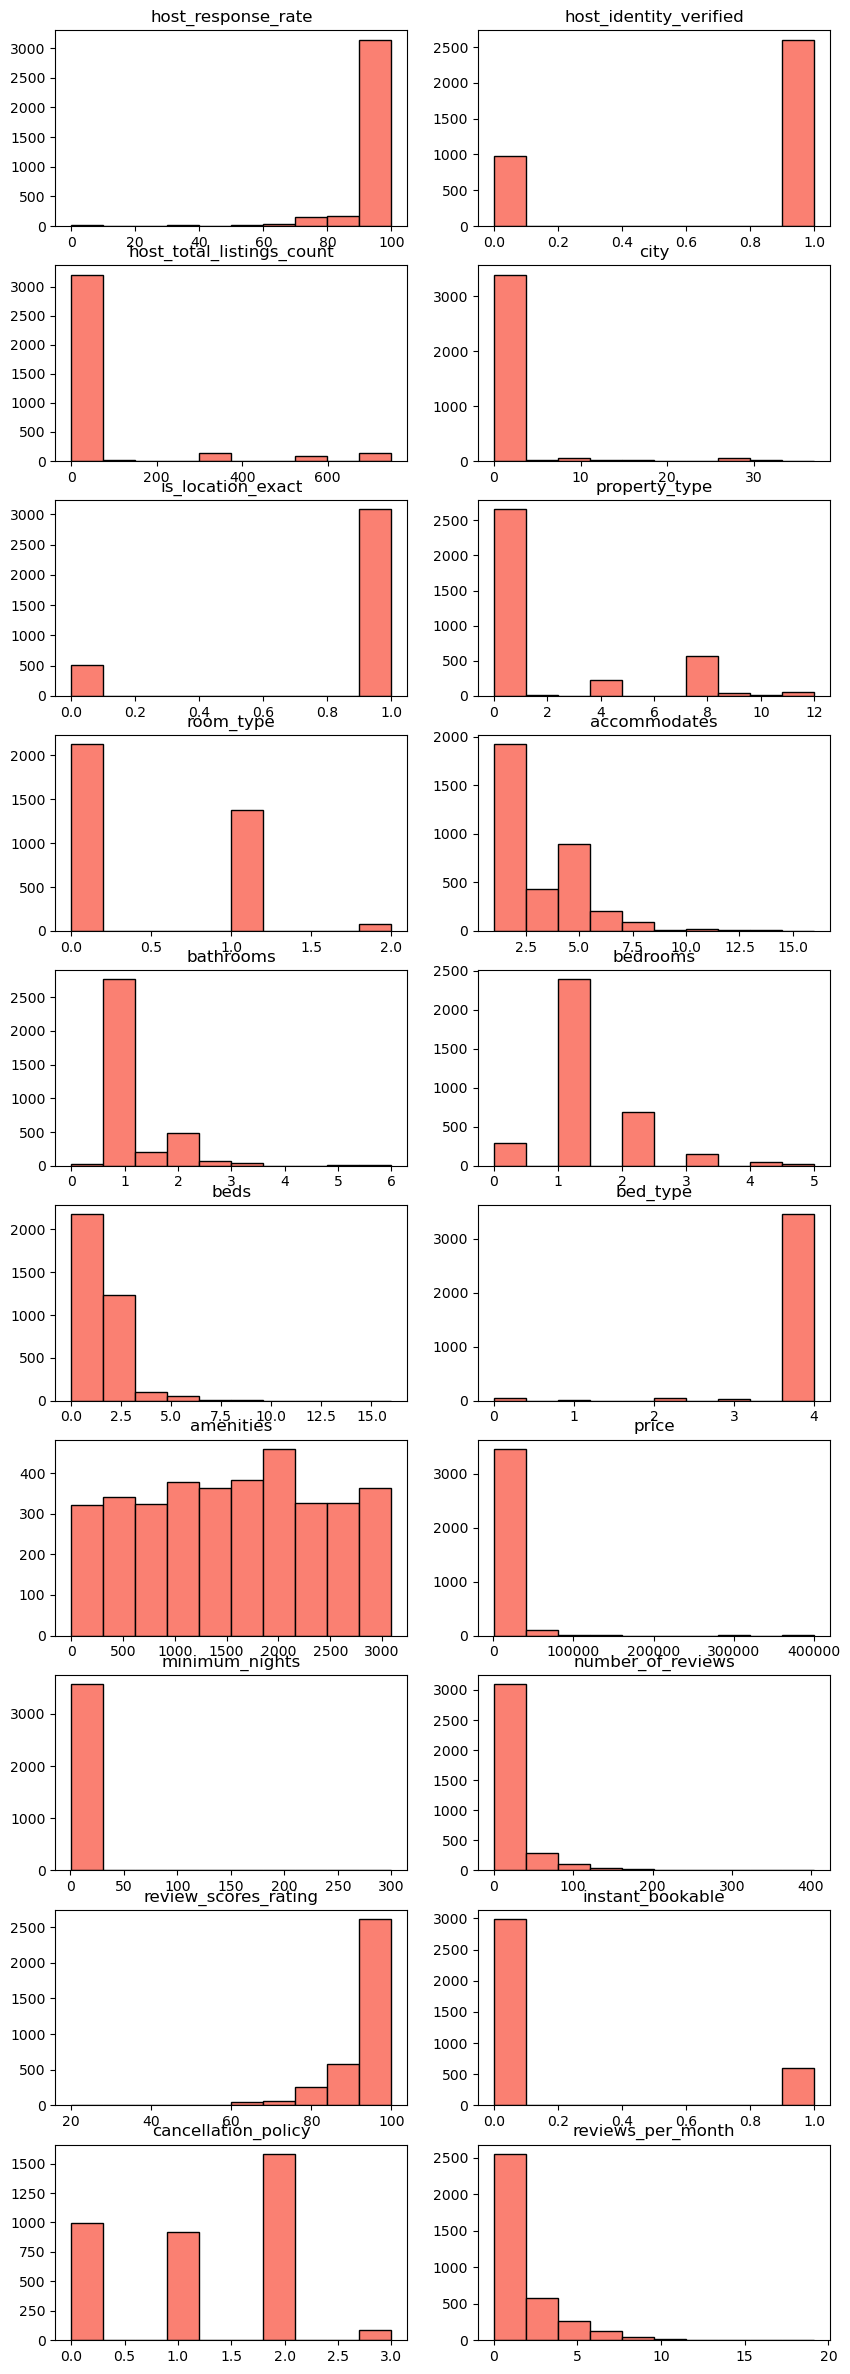

In [7]:
fig,axs=plt.subplots(nrows = 10, ncols = 2, figsize=(10,30))
axs = axs.flatten()
for axes, col in zip(axs,features.columns):
    axes.hist(features[col],edgecolor="black",color="salmon")
    axes.set_title(col)
plt.show()

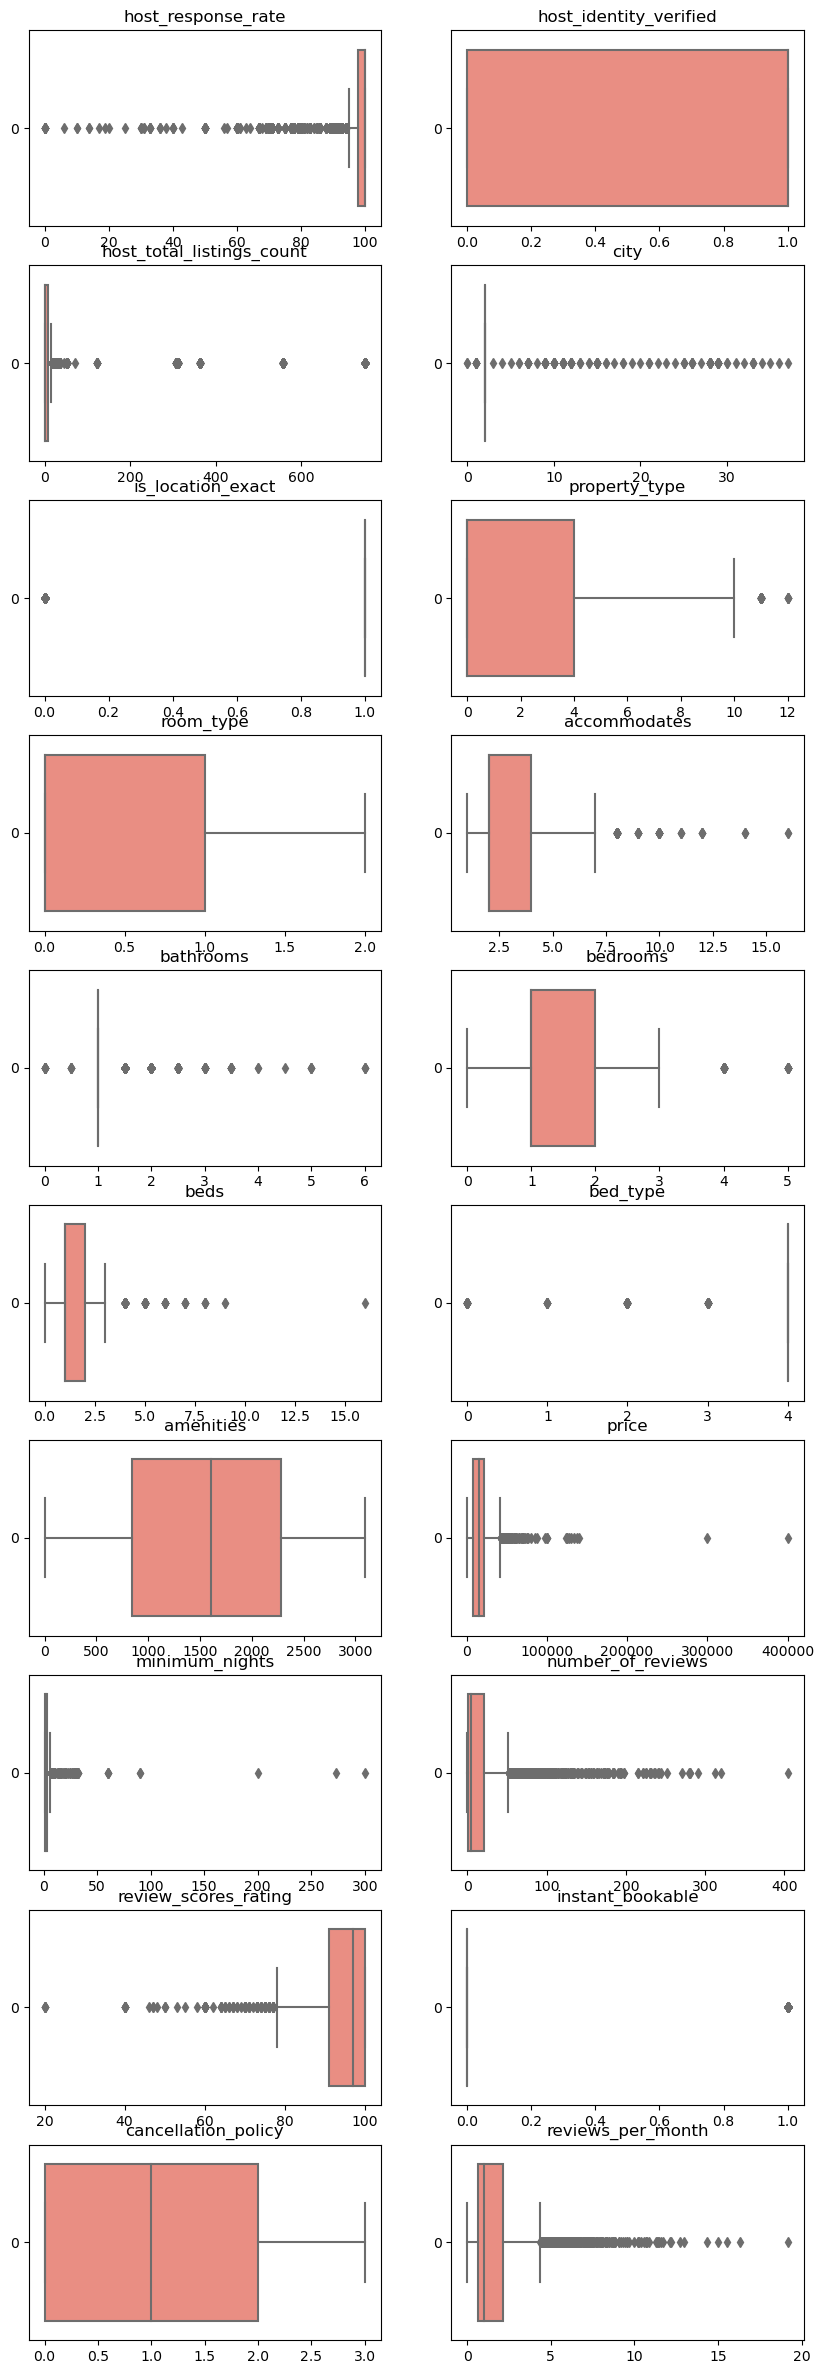

In [8]:
fig,axs=plt.subplots(nrows = 10, ncols = 2, figsize=(10,30))
axs = axs.flatten()
for axes,col in zip(axs,features.columns):
    sns.boxplot(data=features[col], orient='h',ax=axes,color="salmon")
    axes.set_title(col)
plt.show()

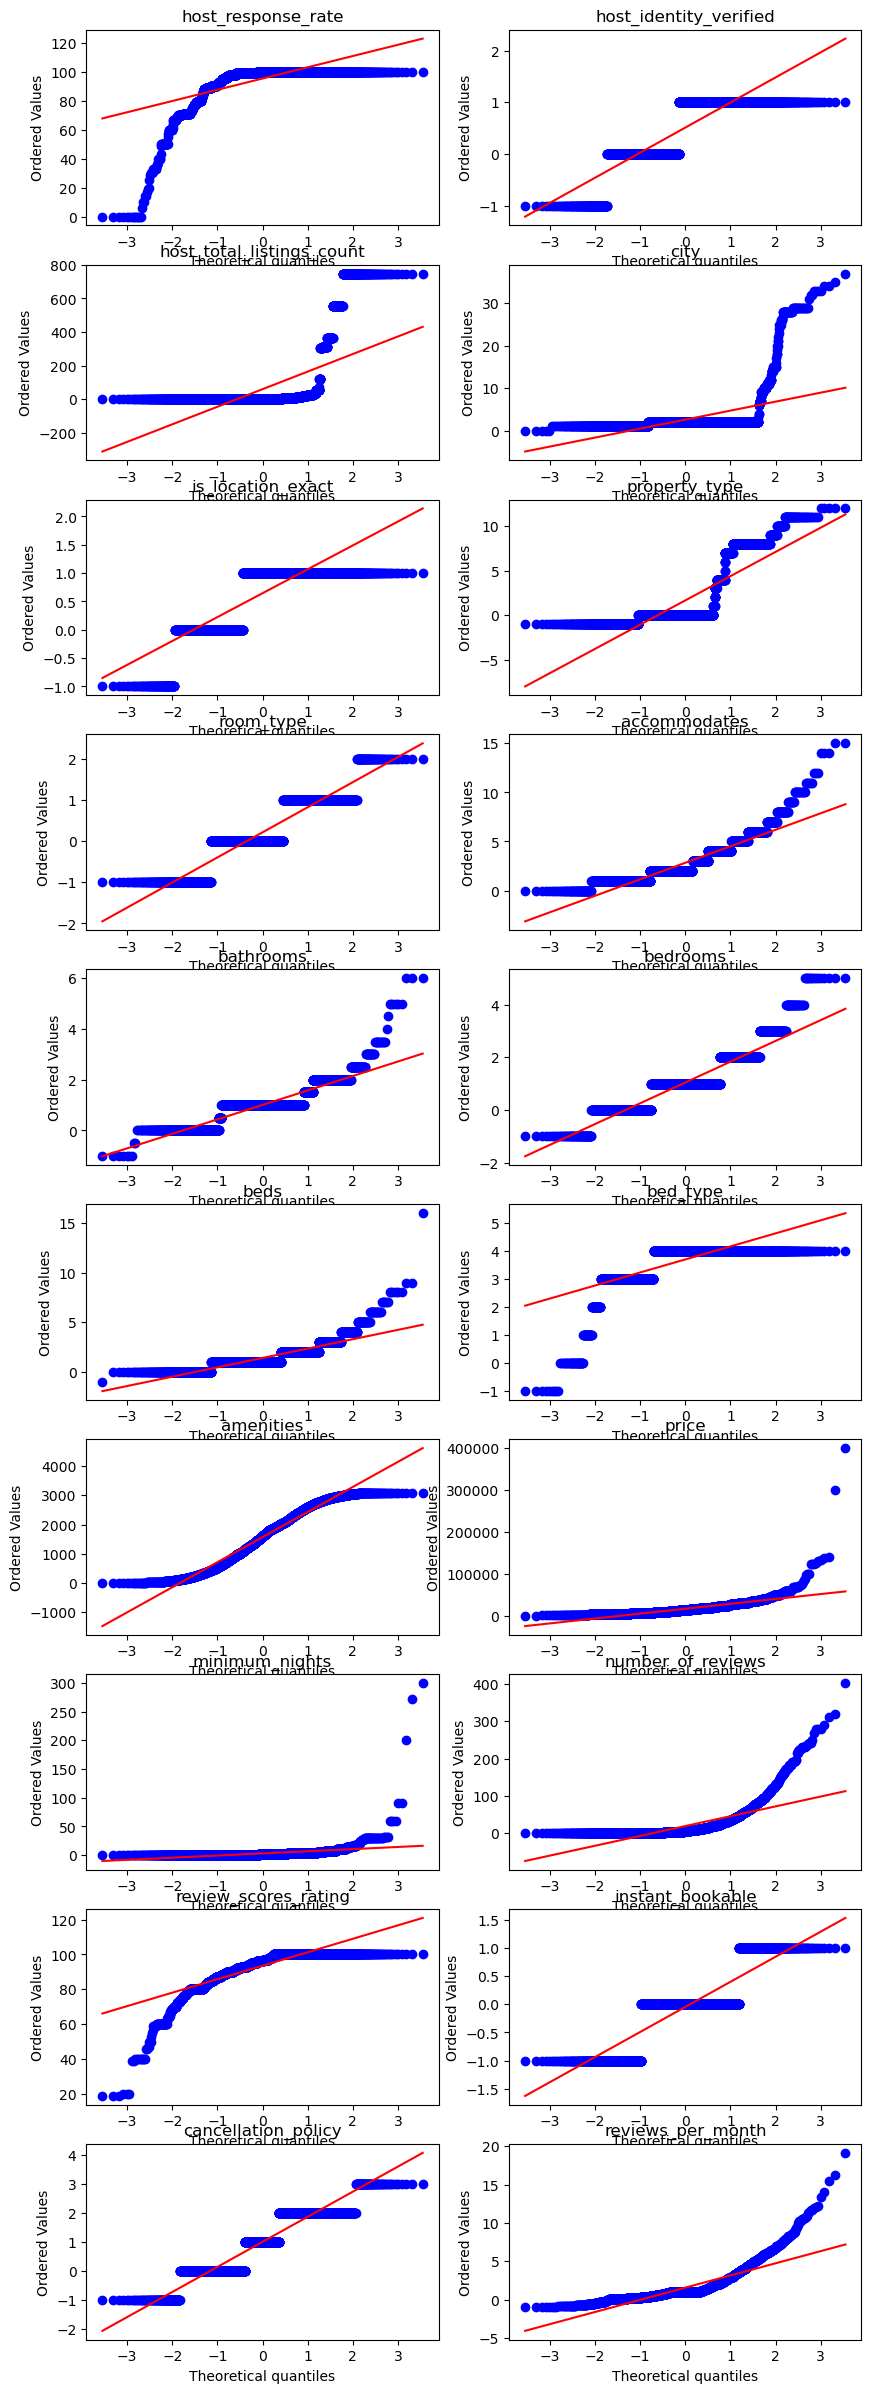

In [9]:
fig, axs = plt.subplots(nrows=10, ncols=2, figsize=(10, 30))
axs = axs.flatten()

for ax, col in zip(axs, features.columns):
    stat.probplot(features[col] - predictor, plot=ax)
    ax.set_title(col)

plt.show()

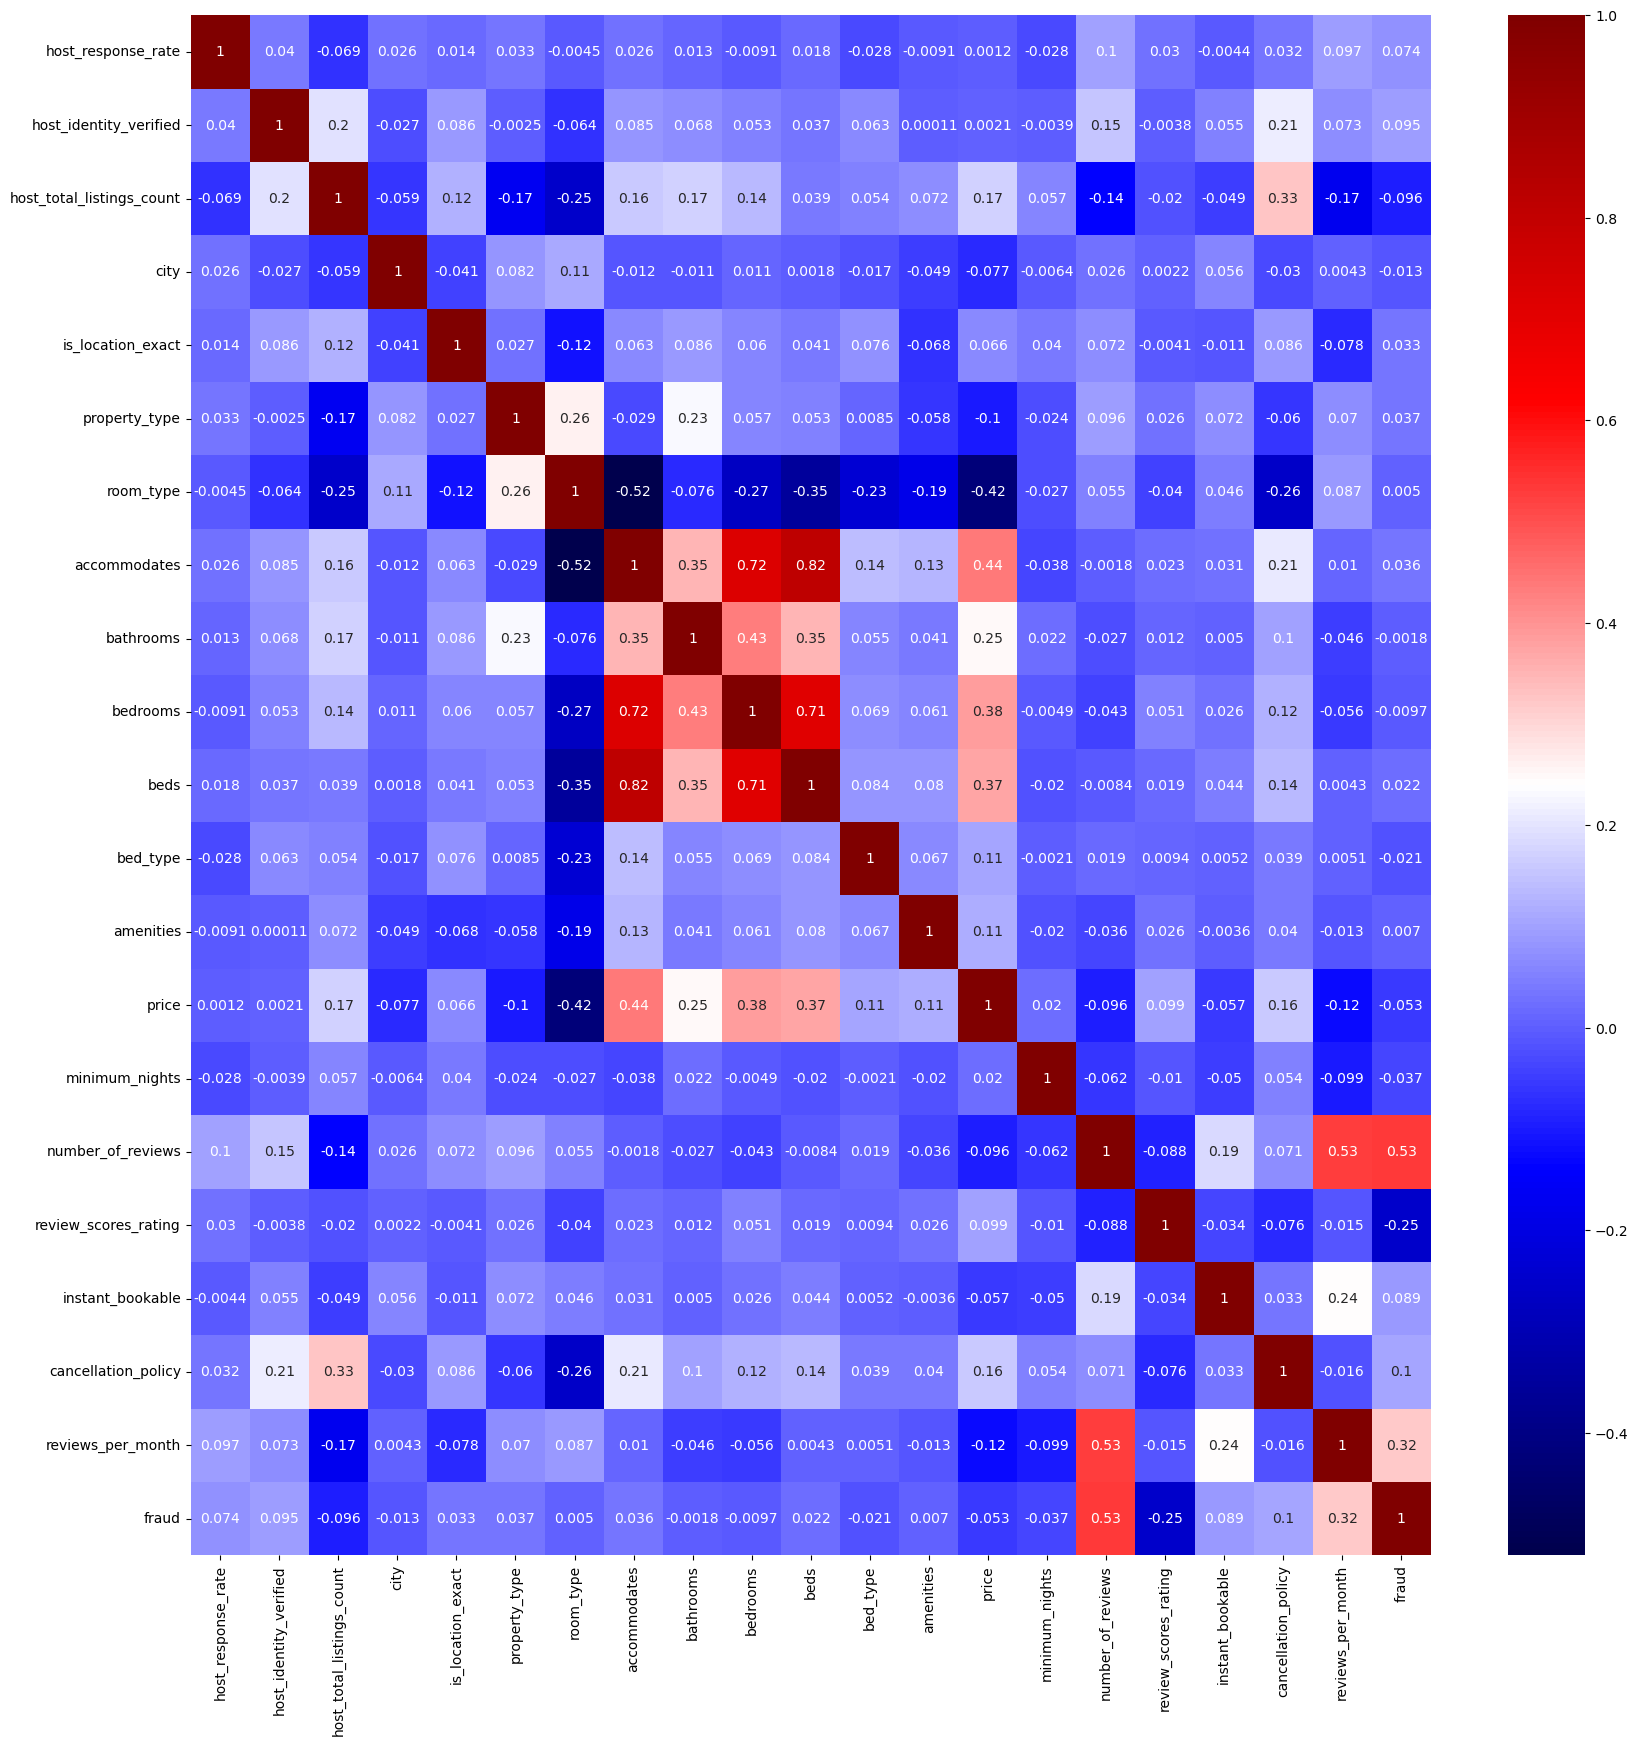

In [10]:
correlation_plot = airbnb_data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation_plot,annot=True,cmap="seismic")
plt.show()

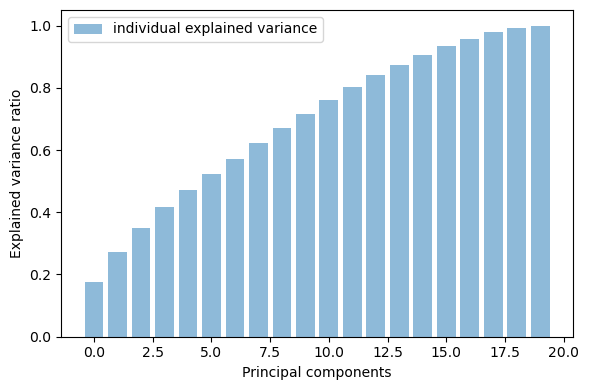

In [11]:
pca_importance = PCA()
scale = StandardScaler()
x_scaled = scale.fit_transform(features)
features_pca = pca_importance.fit_transform(x_scaled)
# Calculate cumulative sum of explained variances
explained_variance = np.cumsum(pca_importance.explained_variance_ratio_)

# Plot the explained variances
plt.figure(figsize=(6, 4))
plt.bar(range(len(explained_variance)), explained_variance, alpha=0.5,
        align='center', label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

In [12]:
from sklearn.feature_selection import SelectKBest, f_classif

# Assuming x and y are your features and target
selector = SelectKBest(f_classif, k=6)  # Change k to the number of features you want to select
x_new = selector.fit_transform(features, predictor)

In [13]:
# Assuming that 'features' is a pandas DataFrame and 'selector' is your fitted SelectKBest object
for i in range(len(features.columns)):
    print(f"Feature {features.columns[i]}: {selector.scores_[i]}")

Feature host_response_rate: 19.516091549399288
Feature host_identity_verified: 32.42969458311193
Feature host_total_listings_count: 32.98977839696962
Feature city: 0.6121268800377849
Feature is_location_exact: 3.9832110411470314
Feature property_type: 4.975047601267859
Feature room_type: 0.08929422564298899
Feature accommodates: 4.768746587002664
Feature bathrooms: 0.011859782466618823
Feature bedrooms: 0.339495205587342
Feature beds: 1.6646550490611474
Feature bed_type: 1.6050661242568802
Feature amenities: 0.176183189439024
Feature price: 9.92876698440186
Feature minimum_nights: 4.8046314483497845
Feature number_of_reviews: 1426.1855532017219
Feature review_scores_rating: 235.7057492927371
Feature instant_bookable: 28.92480699687437
Feature cancellation_policy: 38.39811179290244
Feature reviews_per_month: 416.5287074373132


In [14]:

# Assuming that 'features' is a pandas DataFrame and 'selector' is your fitted SelectKBest object
selected_features_mask = selector.get_support()
selected_features = features.columns[selected_features_mask]

# Get the scores for the selected features
selected_scores = selector.scores_[selected_features_mask]

# Create a DataFrame with the features and their corresponding scores
features_scores_df = pd.DataFrame({'Feature': selected_features, 'Score': selected_scores})

# Sort the DataFrame by score in descending order
features_scores_df = features_scores_df.sort_values(by='Score', ascending=False)

print(features_scores_df)

                     Feature        Score
2          number_of_reviews  1426.185553
5          reviews_per_month   416.528707
3       review_scores_rating   235.705749
4        cancellation_policy    38.398112
1  host_total_listings_count    32.989778
0     host_identity_verified    32.429695


We one-hot encoded the cancellation policy variable as it is a categorical variable. Through one-hot encoding, the models will be able to interpret the data better and produce better results.


Additionally, since Airbnb is about renting out properties to guests, we believe it would be good to **include** another predictor, **'is_location_exact'**, as it would help assess whether the listing's location details match the actual property location.

In [15]:
# Import the encoder from sklearn
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

# OneHotEncoding of categorical predictors (not the response)
airBnb_cat = airbnb_data[['cancellation_policy']]
ohe.fit(airBnb_cat)
airBnb_cat_ohe = pd.DataFrame(ohe.transform(airBnb_cat).toarray(),
                                  columns=ohe.get_feature_names_out(airBnb_cat.columns))

# Check the encoded variables
airBnb_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   cancellation_policy_0  3585 non-null   float64
 1   cancellation_policy_1  3585 non-null   float64
 2   cancellation_policy_2  3585 non-null   float64
 3   cancellation_policy_3  3585 non-null   float64
dtypes: float64(4)
memory usage: 112.2 KB


In [16]:
# Combining Numeric features with the OHE Categorical features
airBnb_num = airbnb_data[['number_of_reviews','review_scores_rating','reviews_per_month', 'host_total_listings_count','host_identity_verified','is_location_exact']]
airBnb_res = airbnb_data['fraud']
airBnb_ohe = pd.concat([airBnb_num, airBnb_cat_ohe, airBnb_res],
                           sort = False, axis = 1).reindex(index=airBnb_num.index)

# Check the final dataframe
airBnb_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   number_of_reviews          3585 non-null   int64  
 1   review_scores_rating       3585 non-null   float64
 2   reviews_per_month          3585 non-null   float64
 3   host_total_listings_count  3585 non-null   int64  
 4   host_identity_verified     3585 non-null   int64  
 5   is_location_exact          3585 non-null   int64  
 6   cancellation_policy_0      3585 non-null   float64
 7   cancellation_policy_1      3585 non-null   float64
 8   cancellation_policy_2      3585 non-null   float64
 9   cancellation_policy_3      3585 non-null   float64
 10  fraud                      3585 non-null   int64  
dtypes: float64(6), int64(5)
memory usage: 308.2 KB


Next, lets look at the class balance.

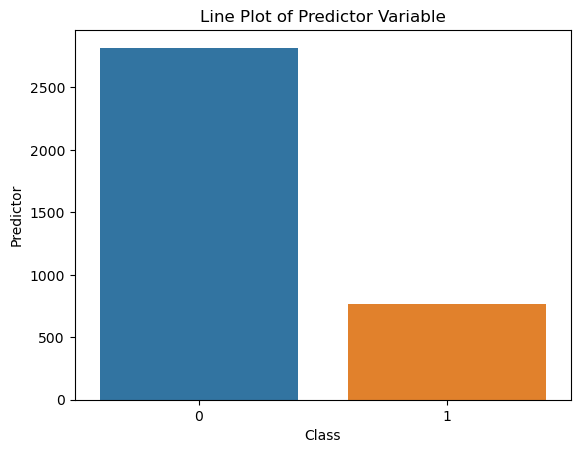

In [17]:
import matplotlib.pyplot as plt

sns.countplot(x=predictor)
plt.xlabel('Class')
plt.ylabel('Predictor')
plt.title('Line Plot of Predictor Variable')
plt.show()

As we can see, the data is highly imbalanced (more class 0 than class 1), this will affect our results tremendously if we train our model with this data.

Lets find out what happens when we use this data for modelling.

In [18]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

# Extract Response and Predictors
y = pd.DataFrame(airBnb_ohe['fraud'])
X = pd.DataFrame(airBnb_ohe.drop('fraud', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=42)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # change max_depth to experiment
dectree.fit(X_train, y_train)                    # train the decision tree model


DecisionTreeClassifier(max_depth=4)

Train Data
Accuracy  :	 0.8696691909127142

TPR Train :	 0.5103578154425612
TNR Train :	 0.9661274014155713

FPR Train :	 0.03387259858442872
FNR Train :	 0.4896421845574388


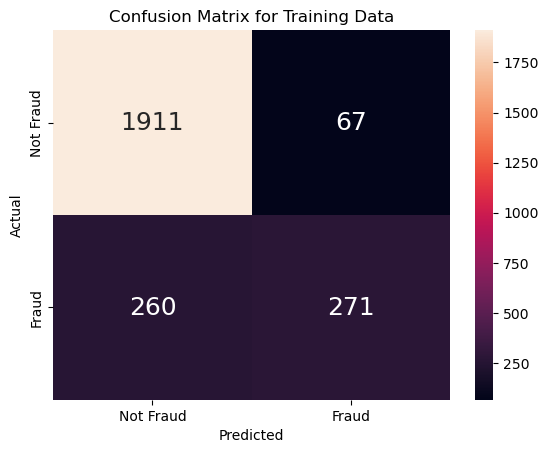

In [19]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Fraud (1) predicted Fraud (1)
fpTrain = cmTrain[0][1] # False Positives : Not Fraud (0) predicted Fraud (1)
tnTrain = cmTrain[0][0] # True Negatives : Not Fraud (0) predicted Not Fraud (0)
fnTrain = cmTrain[1][0] # False Negatives : Fraud (1) predicted Not Fraud (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sns.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18},
           xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Training Data")
plt.show()

Test Data
Accuracy  :	 0.8503717472118959

TPR Test :	 0.4661016949152542
TNR Test :	 0.9583333333333334

FPR Test :	 0.041666666666666664
FNR Test :	 0.5338983050847458


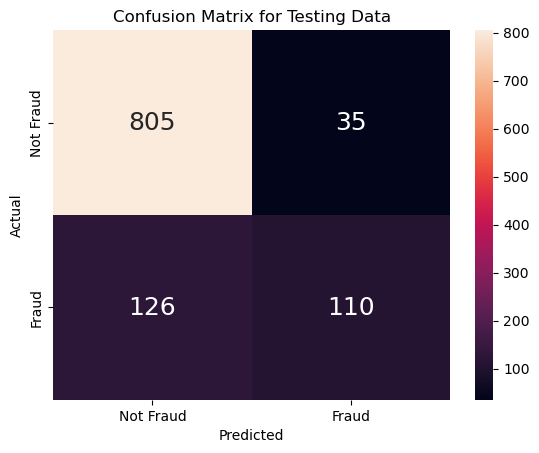

In [20]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Fraud (1) predicted Fraud (1)
fpTest = cmTest[0][1] # False Positives : Not Fraud (0) predicted Fraud (1)
tnTest = cmTest[0][0] # True Negatives : Not Fraud (0) predicted Not Fraud (0)
fnTest = cmTest[1][0] # False Negatives : Fraud (1) predicted Not Fraud (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_test_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18},
           xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Testing Data")
plt.show()

Since the difference of False Positives and False Negatives in both train and test set are not balanced, the model is unable to avoid being biased towards the majority class. Therefore, it is more likely to perform worser on unseen data, as it has learned lesser representative patterns from both classes during training.

**Important** : Note the huge imbalance in the *False Positives* and *False Negatives* in the confusion matrix. *False Positives* are much higher in number than *False Negatives* in both Train and Test data. This is not surprising -- actually, this is a direct effect of the large `Not Fraud` vs `Fraud` class imbalance in the response variable `Fraud`. As `Fraud = Not Fraud` was more likely in the data, *False Positives* are more likely too. Hence resampling on the training data set is needed.

We only resample the **training set** to avoid data leakage and overfitting. Which will lead to unrealistic metrics on our models.

In [21]:
# Upsample Not Fraud to match Fraud
from sklearn.utils import resample

# Combine X_train and y_train
training_data = pd.concat([X_train, y_train], axis=1)
notFraud = training_data[training_data.fraud == 0]
isFraud = training_data[training_data.fraud == 1]

# Upsample the Fraud samples
isFraud_up = resample(isFraud,
                        replace=True,                     # sample with replacement
                        n_samples=notFraud.shape[0])    # to match number of Not Fraud

# Combine the two classes back after upsampling
training_data_resampled = pd.concat([notFraud, isFraud_up])

# Check the ratio of the classes
training_data_resampled['fraud'].value_counts()

fraud
0    1978
1    1978
Name: count, dtype: int64

/Users/keysha/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


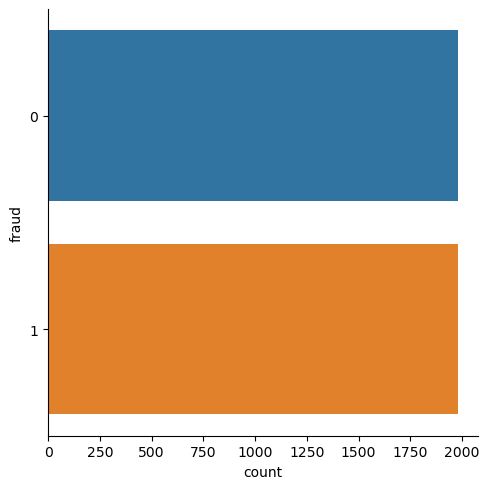

In [22]:
# Quick plot to check the balanced classes visually
sns.catplot(y = 'fraud', data = training_data_resampled, kind = "count")

## Modelling

Since we are dealing whether an Airbnb listing is a scam or not, this would be regarded as a classification problem.

#### **For evaluation metrics, we will be using weighted accuracy/f1-score/precision/recall to compare the models as the testing data is imbalanced. Hence the weighted metrics will give extra weight to the minority class and a lower weight to the majority class.**

### Decision Tree Model

 We shall build a multi-variate Classification Tree with all 6 best predictors as suggested above and Fraud as response.

Additionally, since Airbnb is about renting out properties to guests, we believe it would be good to include another predictor, 'is_location_exact', as it would help assess whether the listing's location details match the actual property location.

In [95]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree


# Split the data into features and target
X_resampled_train = training_data_resampled.drop('fraud', axis=1)
y_resampled_train = training_data_resampled['fraud']
# Define the parameter grid
param_grid = {
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'criterion': ['gini', 'entropy']  # Function to measure the quality of a split
}

# Create a DecisionTreeClassifier instance
dectree = DecisionTreeClassifier(random_state=42,max_depth=4)

# Create the GridSearchCV instance
grid_search = GridSearchCV(dectree, param_grid, cv=5)

# Fit the GridSearchCV instance
grid_search.fit(X_resampled_train, y_resampled_train)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score: 0.8169900649989146


[Text(0.4732142857142857, 0.9, 'number_of_reviews <= 11.5\ngini = 0.5\nsamples = 3956\nvalue = [1978, 1978]\nclass = 0'),
 Text(0.23214285714285715, 0.7, 'review_scores_rating <= 97.5\ngini = 0.295\nsamples = 1857\nvalue = [1523, 334]\nclass = 0'),
 Text(0.14285714285714285, 0.5, 'review_scores_rating <= 79.0\ngini = 0.466\nsamples = 837\nvalue = [528, 309]\nclass = 0'),
 Text(0.07142857142857142, 0.3, 'number_of_reviews <= 1.5\ngini = 0.458\nsamples = 175\nvalue = [62, 113]\nclass = 1'),
 Text(0.03571428571428571, 0.1, 'gini = 0.32\nsamples = 25\nvalue = [20, 5]\nclass = 0'),
 Text(0.10714285714285714, 0.1, 'gini = 0.403\nsamples = 150\nvalue = [42, 108]\nclass = 1'),
 Text(0.21428571428571427, 0.3, 'number_of_reviews <= 5.5\ngini = 0.417\nsamples = 662\nvalue = [466, 196]\nclass = 0'),
 Text(0.17857142857142858, 0.1, 'gini = 0.323\nsamples = 345\nvalue = [275, 70]\nclass = 0'),
 Text(0.25, 0.1, 'gini = 0.479\nsamples = 317\nvalue = [191, 126]\nclass = 0'),
 Text(0.32142857142857145, 

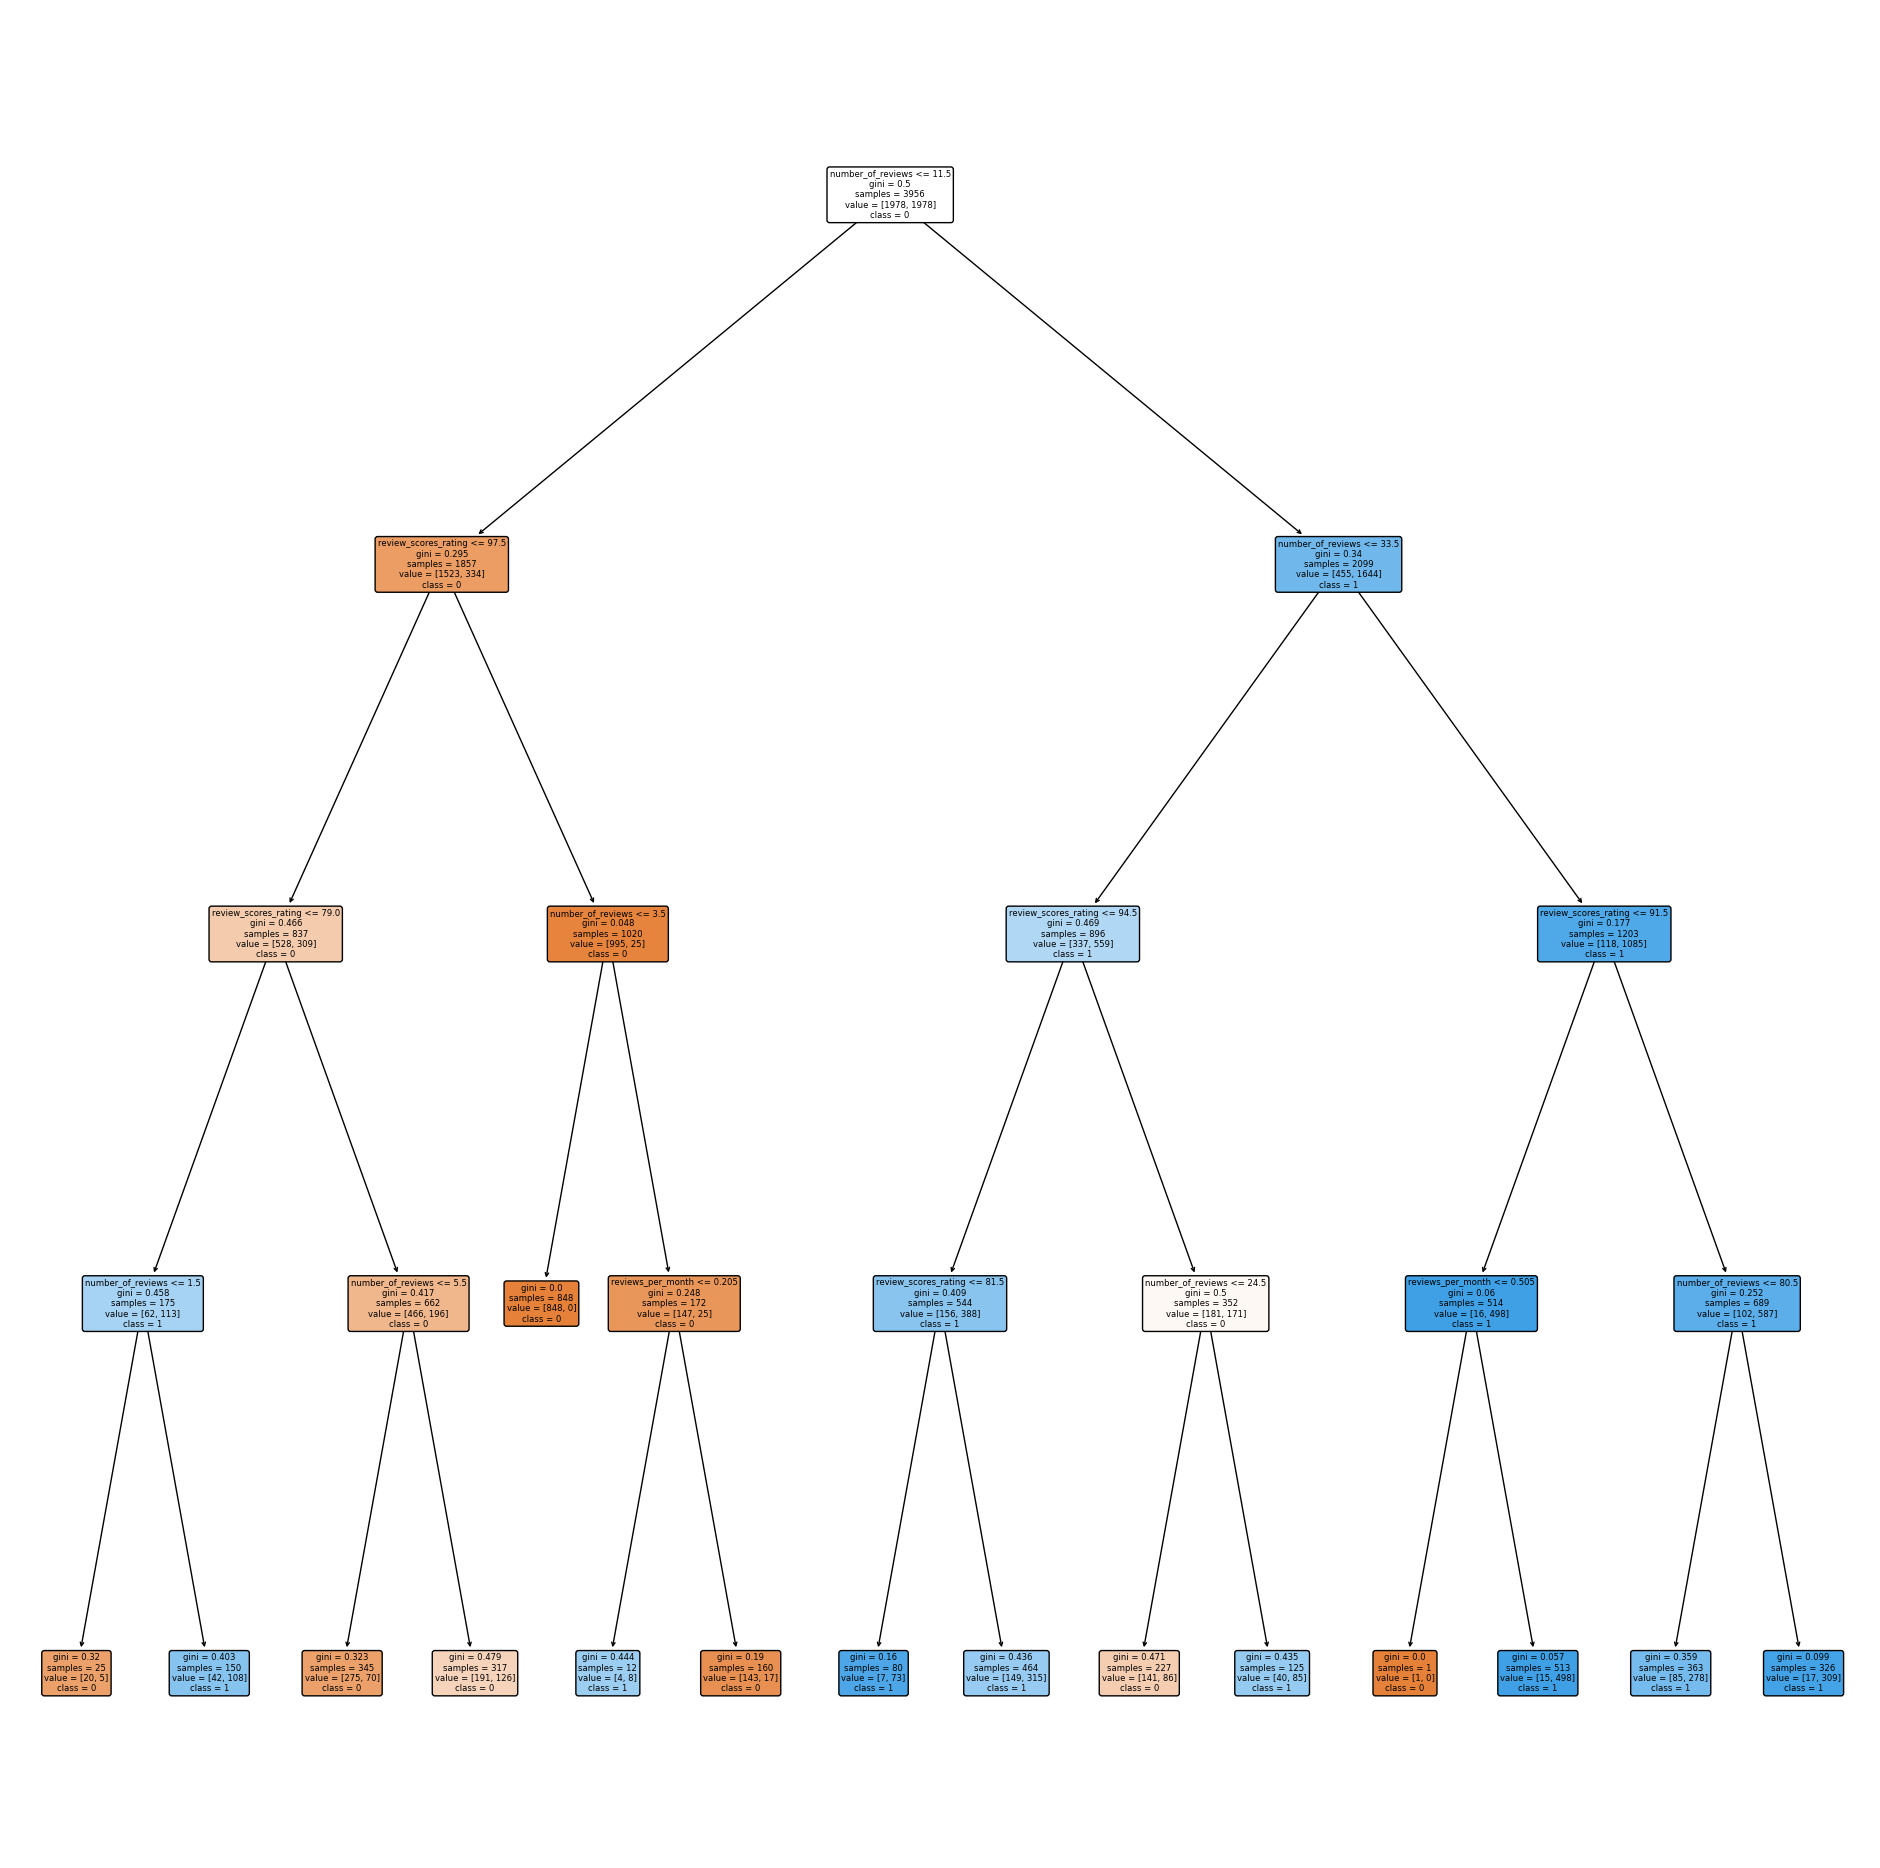

In [96]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(random_state=42,criterion= 'gini', min_samples_leaf= 1, min_samples_split= 2, max_depth=4)  # change max_depth to experiment
dectree.fit(X_resampled_train, y_resampled_train)                    # train the decision tree model

# Plot the trained Decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True,
          feature_names=['number_of_reviews', 'review_scores_rating', 'reviews_per_month', 'host_total_listings_count',
                         'host_identity_verified', 'is_location_exact','cancellation_policy_0','cancellation_policy_1','cancellation_policy_2','cancellation_policy_3'],
          class_names=["0","1"])

In [97]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score

y_pred1 = dectree.predict(X_test)


# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred1))

from sklearn.utils.class_weight import compute_sample_weight

# Assuming y_test are the true labels of the test set
sample_weight_test1 = compute_sample_weight(class_weight='balanced', y=y_test)

from sklearn.metrics import accuracy_score

# Assuming y_true are the true labels, y_pred are the predicted labels
# and sample_weight is a list of weights for each instance
weighted_accuracy1 = accuracy_score(y_test, y_pred1, sample_weight=sample_weight_test1)

print("Weighted Accuracy: ", weighted_accuracy1)


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.82      0.88       840
           1       0.58      0.86      0.69       236

    accuracy                           0.83      1076
   macro avg       0.77      0.84      0.79      1076
weighted avg       0.87      0.83      0.84      1076

Weighted Accuracy:  0.8413942695722357


Train Data
Accuracy  :	 0.8324064711830131

TPR Train :	 0.846309403437816
TNR Train :	 0.8185035389282103

FPR Train :	 0.18149646107178968
FNR Train :	 0.15369059656218403


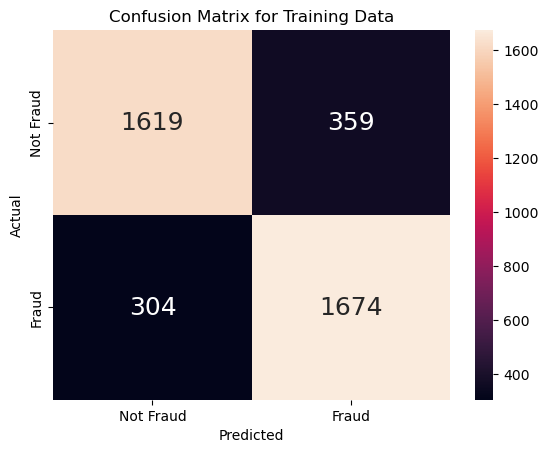

In [98]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_resampled_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_resampled_train, y_resampled_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_resampled_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Fraud (1) predicted Fraud (1)
fpTrain = cmTrain[0][1] # False Positives : Not Fraud (0) predicted Fraud (1)
tnTrain = cmTrain[0][0] # True Negatives : Not Fraud (0) predicted Not Fraud (0)
fnTrain = cmTrain[1][0] # False Negatives : Fraud (1) predicted Not Fraud (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sns.heatmap(confusion_matrix(y_resampled_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18},
           xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Training Data")
plt.show()

Test Data
Accuracy  :	 0.8308550185873605

TPR Test :	 0.8601694915254238
TNR Test :	 0.8226190476190476

FPR Test :	 0.1773809523809524
FNR Test :	 0.13983050847457626


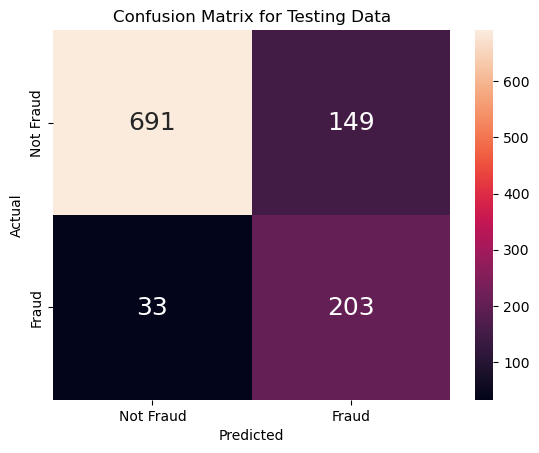

In [99]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Fraud (1) predicted Fraud (1)
fpTest = cmTest[0][1] # False Positives : Not Fraud (0) predicted Fraud (1)
tnTest = cmTest[0][0] # True Negatives : Not Fraud (0) predicted Not Fraud (0)
fnTest = cmTest[1][0] # False Negatives : Fraud (1) predicted Not Fraud (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_test_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18},
           xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Testing Data")
plt.show()

#### Model #1 

Accuracy Train: 83% 

Accuracy Test: 83% 

F1-Score(weighted): 84% 

Precision(Weighted): 87%

Recall(Weighed): 83%

Accuracy(Weighted): 84%

Better model compared to before, as the percentages of True Positives (TP) has greatly improved compared to that of the previous model.

### Random Forest Model

To avoid model that might be overfitting, it's better to figure out what are the exact parameters to look out for!

#### Find the Best Model found through GridSearchCV

In [27]:
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier



# Import GridSearch for hyperparameter tuning using Cross-Validation (CV)
from sklearn.model_selection import GridSearchCV

# Define the Hyper-parameter Grid to search on, in case of Random Forest
param_grid = {'n_estimators': np.arange(100,1001,100),   # number of trees 100, 200, ..., 1000
              'max_depth': np.arange(2, 11)}             # depth of trees 2, 3, 4, 5, ..., 10

# Create the Hyper-parameter Grid
hpGrid = GridSearchCV(RandomForestClassifier(random_state=42),   # the model family
                      param_grid,                 # the search grid
                      cv = 5,                     # 5-fold cross-validation
                      scoring = 'accuracy', n_jobs=-1)       # score to evaluate

# Train the models using Cross-Validation
hpGrid.fit(X_resampled_train, y_resampled_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000])},
             scoring='accuracy')

In [100]:
# Fetch the best Model or the best set of Hyper-parameters
print(hpGrid.best_estimator_)

print('Score (Accuracy):')
print(np.abs(hpGrid.best_score_))

RandomForestClassifier(max_depth=10, n_estimators=800, random_state=42)
Score (Accuracy):
0.9117815321355144


In [34]:


# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 800,
                                 max_depth = 10,random_state=42)

# Fit Random Forest on Train Data
rforest.fit(X_resampled_train, y_resampled_train)
y_pred2 = rforest.predict(X_test)

In [35]:
from sklearn.metrics import classification_report
target_names = ['not fraud', 'fraud']
print(classification_report(y_test, y_pred2, target_names=target_names))

from sklearn.utils.class_weight import compute_sample_weight

# Assuming y_test are the true labels of the test set
sample_weight_test2 = compute_sample_weight(class_weight='balanced', y=y_test)

from sklearn.metrics import accuracy_score

# Assuming y_true are the true labels, y_pred are the predicted labels
# and sample_weight is a list of weights for each instance
weighted_accuracy2 = accuracy_score(y_test, y_pred2, sample_weight=sample_weight_test2)

print("Weighted Accuracy: ", weighted_accuracy2)

              precision    recall  f1-score   support

   not fraud       0.93      0.87      0.90       840
       fraud       0.63      0.76      0.69       236

    accuracy                           0.85      1076
   macro avg       0.78      0.82      0.79      1076
weighted avg       0.86      0.85      0.85      1076

Weighted Accuracy:  0.815546811945117


Train Data
Accuracy  :	 0.954752275025278

TPR Train :	 0.9858442871587462
TNR Train :	 0.9236602628918099

FPR Train :	 0.07633973710819009
FNR Train :	 0.014155712841253791


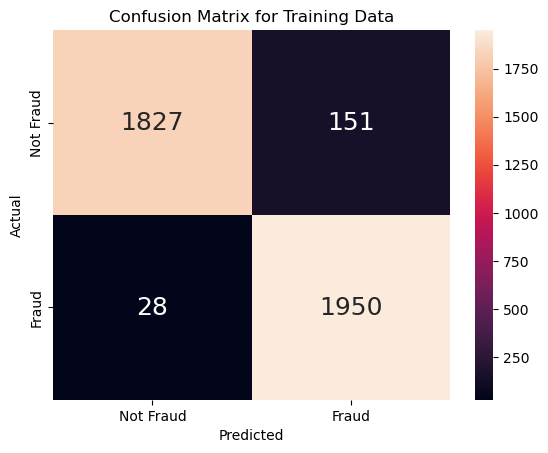

In [31]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_resampled_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_resampled_train, y_resampled_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_resampled_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Fraud (1) predicted Fraud (1)
fpTrain = cmTrain[0][1] # False Positives : Not Fraud (0) predicted Fraud (1)
tnTrain = cmTrain[0][0] # True Negatives : Not Fraud (0) predicted Not Fraud (0)
fnTrain = cmTrain[1][0] # False Negatives : Fraud (1) predicted Not Fraud (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sns.heatmap(confusion_matrix(y_resampled_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18},
           xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Training Data")
plt.show()

Test Data
Accuracy  :	 0.8447955390334573

TPR Test :	 0.7627118644067796
TNR Test :	 0.8678571428571429

FPR Test :	 0.13214285714285715
FNR Test :	 0.23728813559322035


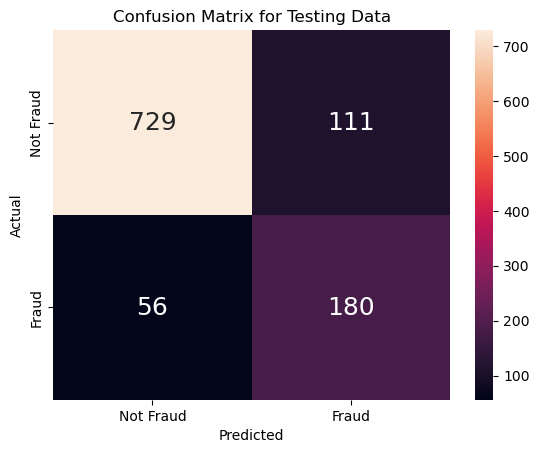

In [32]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Fraud (1) predicted Fraud (1)
fpTest = cmTest[0][1] # False Positives : Not Fraud (0) predicted Fraud (1)
tnTest = cmTest[0][0] # True Negatives : Not Fraud (0) predicted Not Fraud (0)
fnTest = cmTest[1][0] # False Negatives : Fraud (1) predicted Not Fraud (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_test_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18},
           xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Testing Data")
plt.show()

#### Model #2 

Accuracy Train: 95% 

Accuracy Test: 84% 

F1-Score(Weighted): 85% 

Precision(Weighted): 86%

Recall(Weighted): 85%

Accuracy(Weighted): 81%

Compared to Model 1, Model 2 has lower accuracy as well as a higher False Positive Rate (FPR) for both train and test datasets.

### Logistic Regression

In [43]:
from sklearn.model_selection import GridSearchCV
# Extract Response and Predictors

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_normalised = scaler.fit_transform(X_resampled_train)
X_test_normalised = scaler.transform(X_test)
# import the class
from sklearn.linear_model import LogisticRegression
param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization penalty
    'C': [0.01, 0.1, 1, 10,100],  # Inverse of regularization strength
    'solver': ['liblinear', 'saga'],  # Algorithm to use in the optimization problem
'max_iter': [1000, 5000, 10000]  # Maximum number of iterations
}
# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=42)

# Instantiate GridSearchCV
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train_normalised, y_resampled_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)


Best parameters: {'C': 0.1, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'saga'}


In [44]:
logreg = LogisticRegression(random_state=42, max_iter=1000, C=best_params['C'], penalty=best_params['penalty'], solver=best_params['solver'])
# fit the model with data
logreg.fit(X_train_normalised, y_resampled_train)

y_pred3 = logreg.predict(X_test_normalised)

In [45]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred3)
cnf_matrix

array([[707, 133],
       [ 57, 179]])

In [46]:
from sklearn.metrics import classification_report
target_names = ['not fraud', 'fraud']
print(classification_report(y_test, y_pred3, target_names=target_names))

from sklearn.utils.class_weight import compute_sample_weight

# Assuming y_test are the true labels of the test set
sample_weight_test3 = compute_sample_weight(class_weight='balanced', y=y_test)

from sklearn.metrics import accuracy_score

# Assuming y_true are the true labels, y_pred are the predicted labels
# and sample_weight is a list of weights for each instance
weighted_accuracy3 = accuracy_score(y_test, y_pred3, sample_weight=sample_weight_test3)

print("Weighted Accuracy: ", weighted_accuracy3)

              precision    recall  f1-score   support

   not fraud       0.93      0.84      0.88       840
       fraud       0.57      0.76      0.65       236

    accuracy                           0.82      1076
   macro avg       0.75      0.80      0.77      1076
weighted avg       0.85      0.82      0.83      1076

Weighted Accuracy:  0.8000706214689266


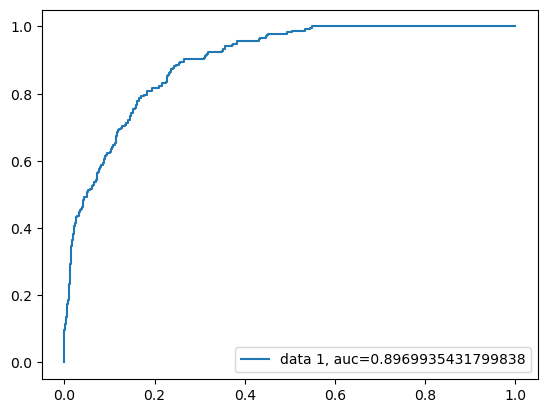

In [47]:
y_pred_proba = logreg.predict_proba(X_test_normalised)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

AUC score for the case is 0.89. AUC score 1 represents a perfect classifier, and 0.5 represents a worthless classifier.

Train Data
Accuracy  :	 0.8038422649140546

TPR Train :	 0.7558139534883721
TNR Train :	 0.8518705763397371

FPR Train :	 0.14812942366026288
FNR Train :	 0.2441860465116279


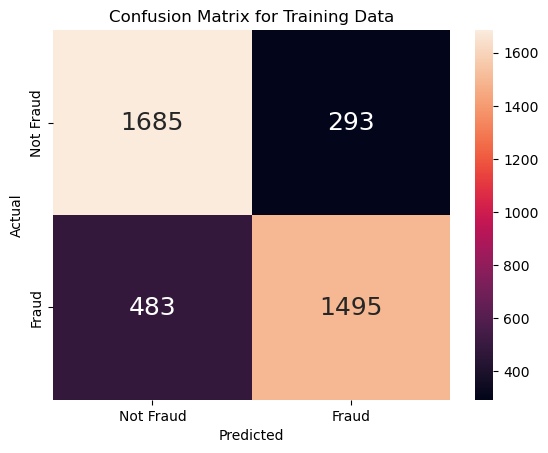

In [48]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_train_pred = logreg.predict(X_train_normalised)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", logreg.score(X_train_normalised, y_resampled_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_resampled_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Fraud (1) predicted Fraud (1)
fpTrain = cmTrain[0][1] # False Positives : Not Fraud (0) predicted Fraud (1)
tnTrain = cmTrain[0][0] # True Negatives : Not Fraud (0) predicted Not Fraud (0)
fnTrain = cmTrain[1][0] # False Negatives : Fraud (1) predicted Not Fraud (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sns.heatmap(confusion_matrix(y_resampled_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18},
           xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Training Data")
plt.show()

Test Data
Accuracy  :	 0.8234200743494424

TPR Test :	 0.7584745762711864
TNR Test :	 0.8416666666666667

FPR Test :	 0.15833333333333333
FNR Test :	 0.24152542372881355


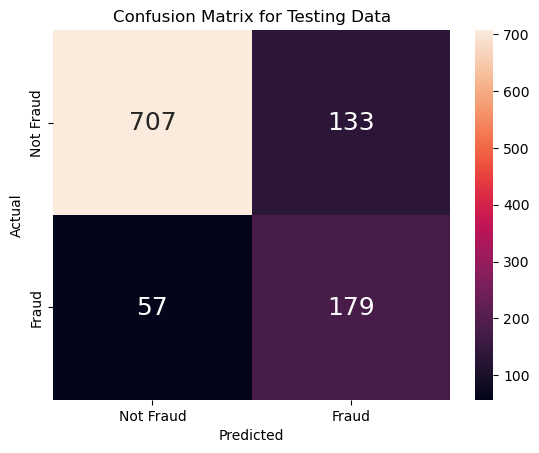

In [49]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = logreg.predict(X_test_normalised)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", logreg.score(X_test_normalised, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Fraud (1) predicted Fraud (1)
fpTest = cmTest[0][1] # False Positives : Not Fraud (0) predicted Fraud (1)
tnTest = cmTest[0][0] # True Negatives : Not Fraud (0) predicted Not Fraud (0)
fnTest = cmTest[1][0] # False Negatives : Fraud (1) predicted Not Fraud (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_test_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18},
           xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Testing Data")
plt.show()

## Model 3

Accuracy Train: 80% 

Accuracy Test: 82% 

F1-Score(weighted): 83% 

Precision(Weighted): 85%

Recall(Weighed): 82%

Accuracy(Weighted): 80%


Compared to the previous 2 models, this model is slightly lacking in accuracy for the train dataset.

### K-Nearest Neighbors (KNN)

In [ ]:

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_resampled_train)
X_test = scaler.transform(X_test)

In [102]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier()
knn.fit(X_train_normalised, y_resampled_train)


KNeighborsClassifier()

#### Using Cross-Validation to get the best value of K

In [56]:
from sklearn.model_selection import cross_val_score


k_values = [i for i in range (1,31)]
scores = []


for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train_normalised, y_resampled_train, cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

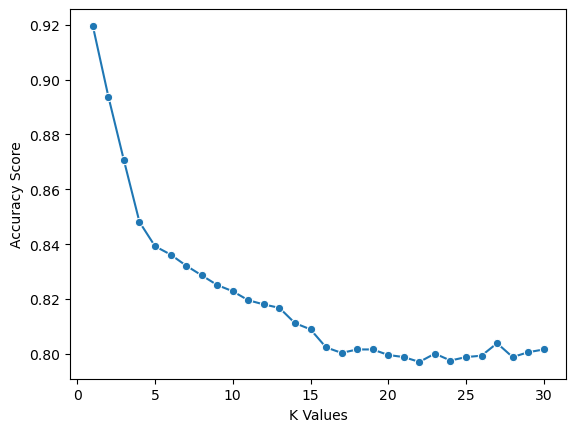

In [57]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

From the chart, we can see that it is advisable to use a smaller value for k.

In [59]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_normalised, y_resampled_train)

KNeighborsClassifier(n_neighbors=1)

As you can see, the best n neighbour score is 1. However we should not use it as it will lead to overfitting as the model will "memorise" the training data. Hence we should use gridsearch to find another n_neighbour value.

Lets try to make our model better

In [63]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'metric': ['euclidean', 'manhattan'],  
    'algorithm': ['auto','brute'],
    'n_neighbors':[3,4,5,6,7]
}

# Instantiate KNN classifier
knn = KNeighborsClassifier()

# Perform grid search
grid_search = GridSearchCV(knn, param_grid, cv=7)
grid_search.fit(X_train_normalised, y_resampled_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)


Best parameters: {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 3}


In [68]:
# fit tune params into knn model
knn = KNeighborsClassifier(metric=best_params['metric'], algorithm=best_params['algorithm'], n_neighbors=3)
knn.fit(X_train_normalised, y_resampled_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [69]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score

y_pred4 = knn.predict(X_test_normalised)


# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred4))

from sklearn.utils.class_weight import compute_sample_weight

# Assuming y_test are the true labels of the test set
sample_weight_test4 = compute_sample_weight(class_weight='balanced', y=y_test)

from sklearn.metrics import accuracy_score

# Assuming y_true are the true labels, y_pred are the predicted labels
# and sample_weight is a list of weights for each instance
weighted_accuracy4 = accuracy_score(y_test, y_pred4, sample_weight=sample_weight_test4)

print("Weighted Accuracy: ", weighted_accuracy4)


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.82      0.86       840
           1       0.51      0.67      0.58       236

    accuracy                           0.79      1076
   macro avg       0.71      0.75      0.72      1076
weighted avg       0.81      0.79      0.80      1076

Weighted Accuracy:  0.7460552865213882


Train Data
Accuracy  :	 0.9390798786653185

TPR Train :	 0.993933265925177
TNR Train :	 0.8842264914054601

FPR Train :	 0.11577350859453994
FNR Train :	 0.006066734074823054


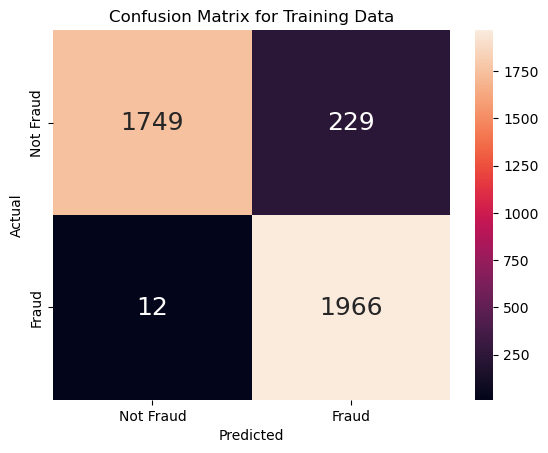

In [70]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix


# Predict the Response corresponding to Predictors
y_train_pred = knn.predict(X_train_normalised)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", knn.score(X_train_normalised, y_resampled_train))
print()


# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_resampled_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Fraud (1) predicted Fraud (1)
fpTrain = cmTrain[0][1] # False Positives : Not Fraud (0) predicted Fraud (1)
tnTrain = cmTrain[0][0] # True Negatives : Not Fraud (0) predicted Not Fraud (0)
fnTrain = cmTrain[1][0] # False Negatives : Fraud (1) predicted Not Fraud (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sns.heatmap(confusion_matrix(y_resampled_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18},
           xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Training Data")
plt.show()

Test Data
Accuracy  :	 0.7890334572490706

TPR Test :	 0.6694915254237288
TNR Test :	 0.8226190476190476

FPR Test :	 0.1773809523809524
FNR Test :	 0.3305084745762712


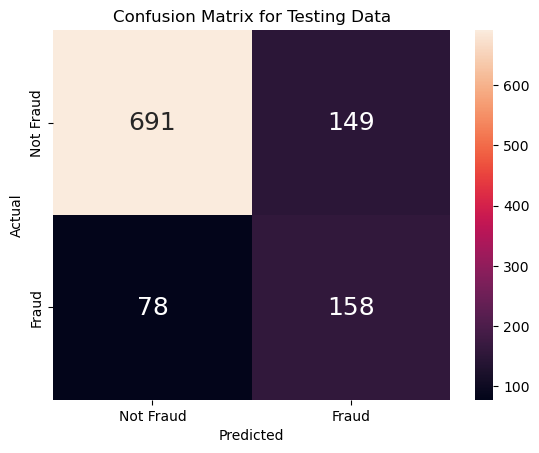

In [71]:


# Predict the Response corresponding to Predictors
y_test_pred = knn.predict(X_test_normalised)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", knn.score(X_test_normalised, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Fraud (1) predicted Fraud (1)
fpTest = cmTest[0][1] # False Positives : Not Fraud (0) predicted Fraud (1)
tnTest = cmTest[0][0] # True Negatives : Not Fraud (0) predicted Not Fraud (0)
fnTest = cmTest[1][0] # False Negatives : Fraud (1) predicted Not Fraud (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_test_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18},
           xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Testing Data")
plt.show()

## Model #4 
Accuracy Train: 93% 

Accuracy Test: 78% 

F1-Score(weighted): 80% 

Precision(Weighted): 81%

Recall(Weighed): 79%

Accuracy(Weighted): 74%

It has a low false positive rate but the false negative rate is quite high for test.

## All Models Weighted Statistics (on Test Sets):
 
### **Decision Tree**

Accuracy: 84%

### **Random Forest**

Accuracy: 81%

### **Logistic Regression**

Accuracy: 80%

### **kNN**

Accuracy: 74%




#### As seen per our models above, we believe DecisionTreeClassifer is the best model suited for solving our problem. Due to its high weighted accuracy while maintaining a balanced performance on true positive rate (TPR) and true negative rate (TNR), Model 1 is the most robust and generalizable among the four models.

# Data-Driven Insights

In [103]:
# Get feature importances
importances = dectree.feature_importances_

# Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
f_importances = pd.Series(importances, X_resampled_train.columns)

# Sort the array in descending order of the importances
f_importances.sort_values(ascending=False, inplace=True)

# Print the feature importances
print(f_importances)

number_of_reviews            0.81816
review_scores_rating         0.17331
reviews_per_month            0.00853
host_total_listings_count    0.00000
host_identity_verified       0.00000
is_location_exact            0.00000
cancellation_policy_0        0.00000
cancellation_policy_1        0.00000
cancellation_policy_2        0.00000
cancellation_policy_3        0.00000
dtype: float64


Number of reviews had the most impact on predicting fake listings, followed by review_scores_ratings.

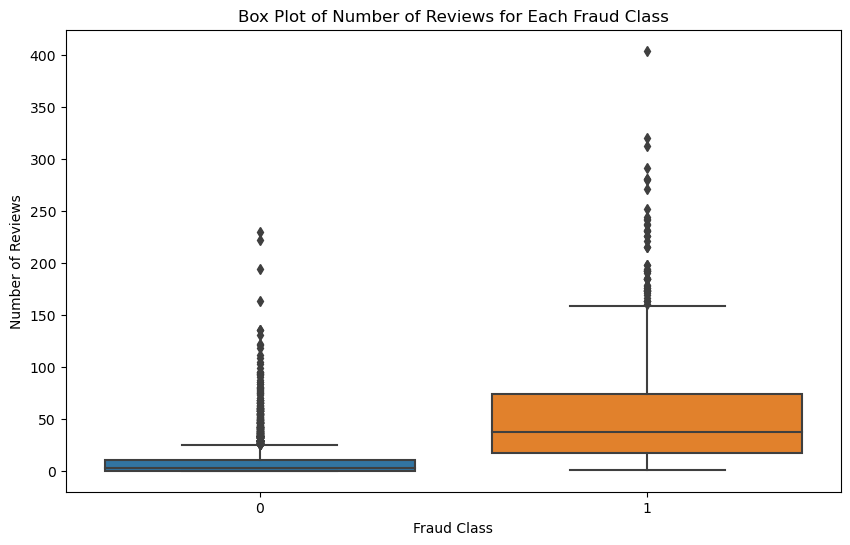

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'number_of_reviews' is your column for number of reviews and 'fraud' is your binary class
plt.figure(figsize=(10,6))
sns.boxplot(x='fraud', y='number_of_reviews', data=airBnb_ohe)
plt.title('Box Plot of Number of Reviews for Each Fraud Class')
plt.xlabel('Fraud Class')
plt.ylabel('Number of Reviews')
plt.show()

Here we can see that fraudalent hosts have higher average reviews compared to real hosts. However, most of these reviews might be fake

In [ ]:


# When fraud = 1
count_fraud_1 = airBnb_ohe[(airBnb_ohe['host_identity_verified'] == 1) & (airBnb_ohe['fraud'] == 1)].shape[0]
count_fraud_0 = airBnb_ohe[(airBnb_ohe['host_identity_verified'] == 0) & (airBnb_ohe['fraud'] == 1)].shape[0]
print("Fake Listings")
print("Number of verified hosts: ", count_fraud_1)
print("Number of unverified hosts: ", count_fraud_0)

# When fraud = 0
count_fraud_1 = airBnb_ohe[(airBnb_ohe['host_identity_verified'] == 1) & (airBnb_ohe['fraud'] == 0)].shape[0]
count_fraud_0 = airBnb_ohe[(airBnb_ohe['host_identity_verified'] == 0) & (airBnb_ohe['fraud'] == 0)].shape[0]
print()
print("Real Listings")
print("Number of verified hosts: ", count_fraud_1)
print("Number of unverified hosts real: ", count_fraud_0)

Fake Listings
Number of verified hosts:  619
Number of unverified hosts:  148

Real Listings
Number of verified hosts:  1984
Number of unverified hosts real:  834


This shows that users should not trust the host verified feature as a large number of them are still scammers.

In [ ]:
# out of 100
average_reviews = airBnb_ohe.groupby('fraud')['review_scores_rating'].mean()
print(average_reviews)

fraud
0    94.921221
1    89.445893
Name: review_scores_rating, dtype: float64


Real hosts have a higher score rating compared to fake hosts. Which is accurate as fake hosts will receive bad scores after users figure out that they got scammed

In [79]:
# Assuming df is your DataFrame, 'is_location_exact' and 'fraud' are your columns
fraud_cases = airBnb_ohe[airBnb_ohe['fraud'] == 1]
percentagefraud = (fraud_cases['is_location_exact'] == 1).mean() * 100
fraud_cases = airBnb_ohe[airBnb_ohe['fraud'] == 0]
percentagenotfraud = (fraud_cases['is_location_exact'] == 1).mean() * 100


print("Percentage of fake listings with exact locations: ", percentagefraud)
print("Percentage of true listings with exact locations: ", percentagenotfraud)

Percentage of fake listings with exact locations:  88.13559322033898
Percentage of true listings with exact locations:  85.30872959545776


From the above statistic, we can tell that there is a higher percentage of fake listings using exact locations compared to real listings.

Users should proceed with caution when choosing a listing with exact location listed.

Real listings might omit the exact location of their listing for security purposes.

It is easy for scammers to search for exact locations of various listings to look legitimate.